In [1]:
from sympy import*
from sympy.physics.quantum import TensorProduct
init_printing()

<h1>Operators</h1>

In [2]:
sigZ = zeros(2,2)
sigZ[0,0] = -S(1)/2; sigZ[1,1] = S(1)/2
sigZ1 = TensorProduct(sigZ, eye(2))
sigZ2 = TensorProduct(eye(2), sigZ)
sigM = zeros(2,2)
sigM[0,1] = 1
sigM1 = TensorProduct(sigM, eye(2))
sigM2 = TensorProduct(eye(2), sigM)
sigP1 = conjugate(sigM1.T)
sigP2 = conjugate(sigM2.T)

<h1>Parameters</h1>

In [3]:
g1, g2, g12 = symbols('Gamma_1, Gamma_2, Gamma_12', positive = True)
w1, w2, wl, Om1, Om2, dip, t = symbols('omega_1, omega_2, omega_l, Omega_1, Omega_2, Lambda, t', real = True)

<h1>Hamiltonian</h1>

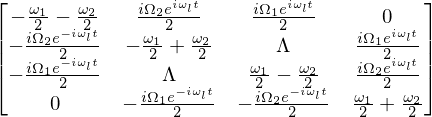

In [8]:
H0 = w1*sigZ1 + w2*sigZ2 + dip*(sigP1*sigM2+sigP2*sigM1) -I/2*(Om1*sigP1*exp(-I*wl*t)+Om2*sigP2*exp(-I*wl*t))
H0+= I/2*(Om1*sigM1*exp(I*wl*t)+Om2*sigM2*exp(I*wl*t))
H0

<h1>Unitary transformation</h1>

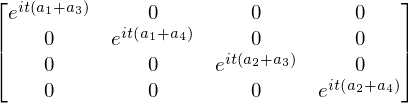

In [9]:
a1, a2, a3, a4 = symbols("a1:5", real = True)
# U = exp(I*t*(a1*sigM1*sigP1*sigM2*sigP2+a2*sigM1*sigP1*sigP2*sigM2
#              +a3*sigP1*sigM1*sigM2*sigP2+a4*sigP1*sigM1*sigP2*sigM2))
U = exp(I*t*(a1*sigM1*sigP1+a2*sigP1*sigM1+a3*sigM2*sigP2+a4*sigP2*sigM2))
U

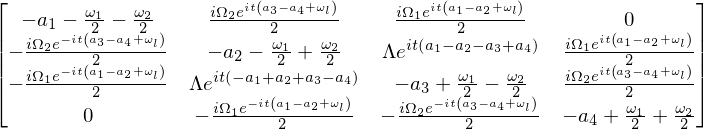

In [10]:
H = U*H0*conjugate(U.T)-(a1*sigM1*sigP1*sigM2*sigP2+a2*sigM1*sigP1*sigP2*sigM2
                         +a3*sigP1*sigM1*sigM2*sigP2+a4*sigP1*sigM1*sigP2*sigM2)
H.simplify()

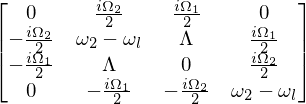

In [17]:
A1 = -(w1+w2)/2
A2 = -(w1+w2)/2 + wl
A3 = (w1-w2)/2
A4 = (w1-w2)/2 + wl
H.subs([(a1, A1), (a2, A2), (a3, A3), (a4, A4)]).simplify()

In [18]:
Um1 = (U*sigM1*conjugate(U.T)).subs([(a1, A1), (a2, A2), (a3, A3), (a4, A4)]).simplify()
Um2 = (U*sigM2*conjugate(U.T)).subs([(a1, A1), (a2, A2), (a3, A3), (a4, A4)]).simplify()
Up1 = (U*sigP1*conjugate(U.T)).subs([(a1, A1), (a2, A2), (a3, A3), (a4, A4)]).simplify()
Up2 = (U*sigP2*conjugate(U.T)).subs([(a1, A1), (a2, A2), (a3, A3), (a4, A4)]).simplify()

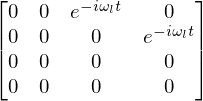

In [23]:
Um1